# Logistic Regression
__~ Anish Sachdeva__

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Sigmoid Function
$$
g(z) = \frac{1}{1 + e^{-z}}
$$

In [147]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

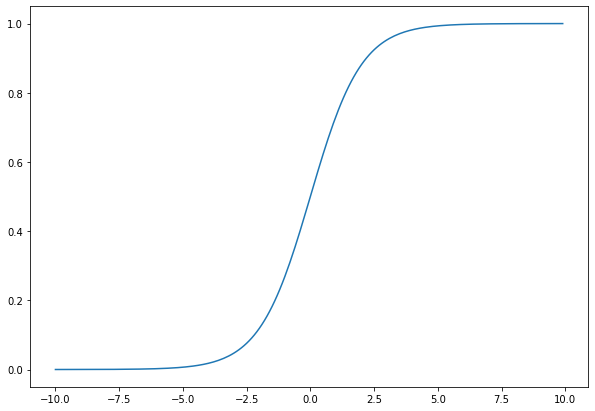

In [148]:
x = np.arange(-10, 10, 0.1)
plt.figure(figsize=(10, 7))
plt.plot(x, sigmoid(x))
plt.show()

## Loading Breast Cancer Data

In [149]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target

In [150]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [151]:
X.shape

(569, 30)

In [152]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [153]:
Y.shape

(569,)

## Normalizing the Data

In [154]:
X.std(axis=0)

array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
       1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
       2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
       2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
       3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
       4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
       2.28123569e-02, 1.57198171e-01, 2.08440875e-01, 6.56745545e-02,
       6.18130785e-02, 1.80453893e-02])

In [155]:
mu = X.mean(axis=0)
sigma = X.std(axis=0)
X = (X - mu) / sigma

In [156]:
X.shape

(569, 30)

In [157]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [158]:
mu = Y.mean()
sigma = Y.std()
Y = (Y - mu) / sigma

In [159]:
Y.shape

(569,)

In [160]:
Y

array([-1.29767572, -1.29767572, -1.29767572, -1.29767572, -1.29767572,
       -1.29767572, -1.29767572, -1.29767572, -1.29767572, -1.29767572,
       -1.29767572, -1.29767572, -1.29767572, -1.29767572, -1.29767572,
       -1.29767572, -1.29767572, -1.29767572, -1.29767572,  0.77060855,
        0.77060855,  0.77060855, -1.29767572, -1.29767572, -1.29767572,
       -1.29767572, -1.29767572, -1.29767572, -1.29767572, -1.29767572,
       -1.29767572, -1.29767572, -1.29767572, -1.29767572, -1.29767572,
       -1.29767572, -1.29767572,  0.77060855, -1.29767572, -1.29767572,
       -1.29767572, -1.29767572, -1.29767572, -1.29767572, -1.29767572,
       -1.29767572,  0.77060855, -1.29767572,  0.77060855,  0.77060855,
        0.77060855,  0.77060855,  0.77060855, -1.29767572, -1.29767572,
        0.77060855, -1.29767572, -1.29767572,  0.77060855,  0.77060855,
        0.77060855,  0.77060855, -1.29767572,  0.77060855, -1.29767572,
       -1.29767572,  0.77060855,  0.77060855,  0.77060855,  0.77

## Splitting The Data into Training and Validation Data

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)
X_train.shape

(455, 30)

In [163]:
Y_train.shape

(455,)

In [164]:
X_test.shape

(114, 30)

In [165]:
Y_test.shape

(114,)

## Hypothesis Function
$$
h_{\theta}(x) = g(\theta^{T}x) \\
g(z) = \frac{1}{1 + e^{-z}}
$$

In [183]:
def hypothesis(x, theta):
    return sigmoid(x.dot(theta))

In [184]:
hypothesis(np.array([1, 3]), [1, 1])

0.9820137900379085

## Cost Function (J)

$$
\text{cost($x, \theta$)} = \begin{cases}
    -\log{h_{\theta}(x)} \hspace{.4cm} \text{if y = 1}\\
    - \log{(1 - h_{\theta}(x))} \hspace{.4cm} \text{if y = 0}
\end{cases}
$$

$$
y \in {0, 1}
$$

$$
J_{\theta}(x) = \frac{1}{m} \Sigma \hspace{.2cm} \text{cost($x_i, \theta$)} \\
J_{\theta}(x) = - \frac{1}{m} \Sigma \hspace{.2cm} y^{(i)} \log{h_{\theta}(x^{(i)})} + (1 - y^{(i)}) \log{(1 - h_{\theta}(x))}
$$

c:\users\anish\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


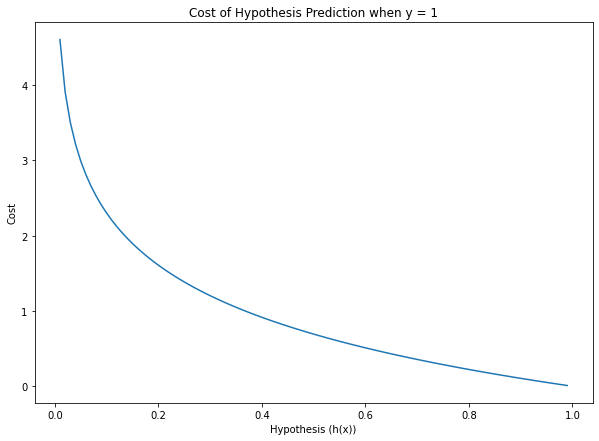

In [168]:
## Case where y = 1
plt.figure(figsize=(10, 7))
x = np.arange(0 , 1, 0.01)
plt.plot(x, -np.log(x))
plt.xlabel('Hypothesis (h(x))')
plt.ylabel('Cost')
plt.title('Cost of Hypothesis Prediction when y = 1')
plt.show()

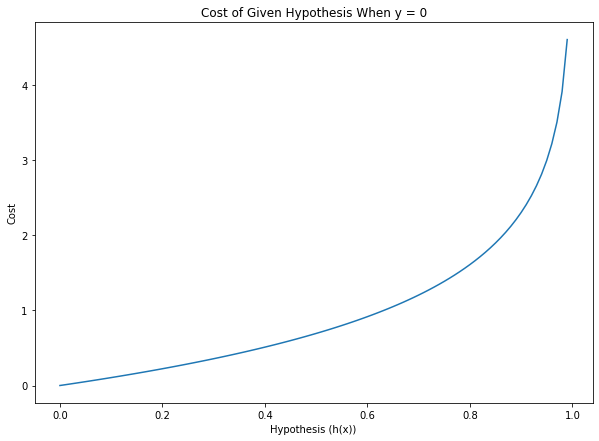

In [169]:
plt.figure(figsize=(10, 7))
plt.plot(x, -np.log(1 - x))
plt.xlabel('Hypothesis (h(x))')
plt.ylabel('Cost')
plt.title('Cost of Given Hypothesis When y = 0')
plt.show()

In [170]:
# creating the cost function
def J(x, y, theta):
    hx = hypothesis(x, theta)
    return - (y * np.log(hx) + (1 - y) * np.log(1 - hx)).mean()

In [171]:
m, n = X.shape
m, n

(569, 30)

In [200]:
# creating random theta 
theta = np.random.rand(n, 1)
theta

array([[0.96682943],
       [0.20573191],
       [0.12860493],
       [0.03695873],
       [0.12189853],
       [0.73329293],
       [0.69231323],
       [0.04817956],
       [0.91512769],
       [0.63922731],
       [0.29299379],
       [0.33807853],
       [0.75200934],
       [0.21119736],
       [0.15484679],
       [0.9510161 ],
       [0.68443627],
       [0.08650858],
       [0.37131414],
       [0.21365608],
       [0.77351629],
       [0.82018863],
       [0.76907055],
       [0.67138437],
       [0.61118893],
       [0.71089348],
       [0.7158348 ],
       [0.07237103],
       [0.2568339 ],
       [0.01273312]])

In [201]:
theta.shape

(30, 1)

In [186]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [217]:
def hypothesis(x, theta):
    return sigmoid(x.dot(theta))

In [208]:
hypothesis(X, theta)

h


array([[1.00000000e+00],
       [9.40322495e-01],
       [9.99992915e-01],
       [1.00000000e+00],
       [9.98879429e-01],
       [9.98728602e-01],
       [9.75826089e-01],
       [9.98178648e-01],
       [9.99915460e-01],
       [9.99999996e-01],
       [5.12282120e-02],
       [9.98197798e-01],
       [1.00000000e+00],
       [6.65231585e-01],
       [9.99997225e-01],
       [9.99996653e-01],
       [3.44059314e-01],
       [9.99989513e-01],
       [9.99942416e-01],
       [1.35677180e-02],
       [2.81395809e-02],
       [9.58682282e-05],
       [9.99997088e-01],
       [9.99811220e-01],
       [9.99993556e-01],
       [9.99999974e-01],
       [9.99858983e-01],
       [9.98525518e-01],
       [9.99984442e-01],
       [9.17288121e-01],
       [9.99999790e-01],
       [9.99937951e-01],
       [9.99994000e-01],
       [9.99995068e-01],
       [9.98988851e-01],
       [9.98882214e-01],
       [9.78904729e-01],
       [3.61371425e-05],
       [1.01489167e-02],
       [6.37345993e-01],


## Computing The Gradient

In [209]:
def gradient(X, Y, theta):
    m, _ = X.shape
    hx = hypothesis(X, theta)
    return np.dot(X.T, (hx - Y)) / m

## Gradient Descent

In [221]:
def gradient_descent(X, Y, lr=0.005, max_itr=1000):
    err_list = []
    m, n = X.shape
    theta = np.random.rand(n, 1)
    for i in range(max_itr):
        err = J(X, Y, theta)
        err_list.append(err)
        grad = gradient(X, Y, theta)
        theta -= lr * grad
        if i % 100 == 0:
            print(f'Iteration no {i} and cost {err}')
    return theta, err_list

## Adding a Feature Column with (1)'s

In [211]:
X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))
X_train

array([[ 1.        ,  1.        , -0.47353452, ..., -1.33699001,
        -1.00424655, -0.75730243],
       [ 1.        ,  1.        , -0.42809225, ...,  0.05167567,
        -0.12093834,  0.65968002],
       [ 1.        ,  1.        ,  0.4551919 , ...,  0.46583912,
        -0.55612133, -0.11835806],
       ...,
       [ 1.        ,  1.        , -0.64678318, ..., -0.35335182,
         0.32395133, -0.76893975],
       [ 1.        ,  1.        , -0.18384004, ...,  1.69310287,
        -0.15167617,  1.28310797],
       [ 1.        ,  1.        , -1.33608564, ..., -1.74506282,
        -0.68877934, -0.78999777]])

In [212]:
X_train.shape

(455, 32)

In [213]:
Y_train = Y_train.reshape((-1, 1))
Y_train.shape

(455, 1)

In [214]:
X_test.shape

(114, 30)

In [215]:
Y_test = Y_test.reshape((-1, 1))
Y_test.shape

(114, 1)

In [222]:
## Applying Gradient Descent and Training the Model
theta, err_list = gradient_descent(X_train, Y_train)

c:\users\anish\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Iteration no 0 and cost inf
Iteration no 100 and cost 2.456502261868214
Iteration no 200 and cost -1.308148758851749
Iteration no 300 and cost -3.3615641772827507
Iteration no 400 and cost -5.115034942704401
Iteration no 500 and cost -6.7944734023797455
Iteration no 600 and cost -8.44077282940038
Iteration no 700 and cost -10.070615997102584
Iteration no 800 and cost -11.694302364288303
Iteration no 900 and cost inf
